# 📦 Step 1: Importing Required Library

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

# Initialize 5-fold CV

In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Unpruned tree

In [4]:
tree_unpruned = DecisionTreeClassifier(random_state=42)
unpruned_scores = cross_val_score(tree_unpruned, X, y, cv=kf)

# Pruned tree (Post-pruning via max_depth)

In [5]:
tree_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
pruned_scores = cross_val_score(tree_pruned, X, y, cv=kf)

# Results

In [6]:
print("Unpruned Accuracy Scores:", unpruned_scores)
print("Pruned Accuracy Scores:", pruned_scores)

Unpruned Accuracy Scores: [0.94736842 0.92982456 0.90350877 0.94736842 0.9380531 ]
Pruned Accuracy Scores: [0.94736842 0.96491228 0.92982456 0.94736842 0.94690265]


# Tree Visualization

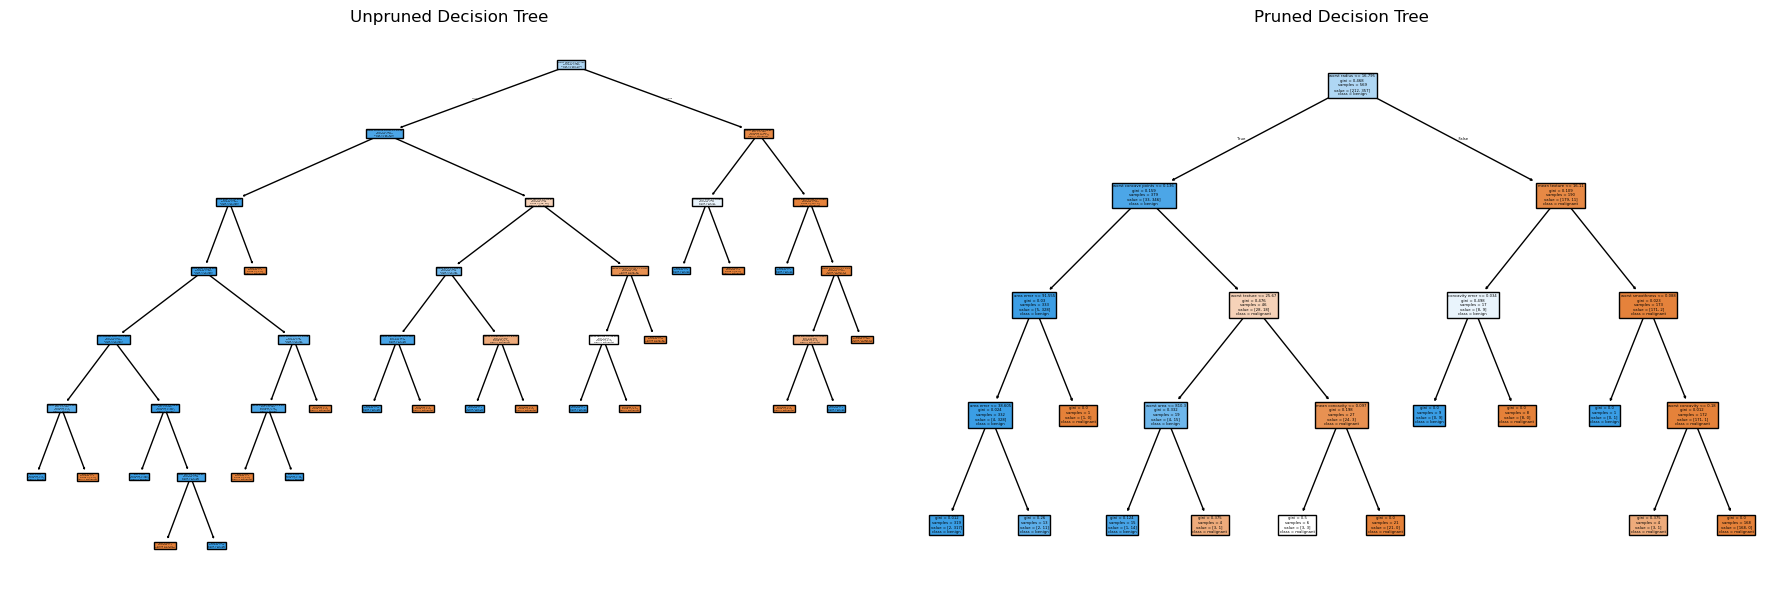

In [7]:
# Visualizing both trees using fit on full dataset
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Fit and plot unpruned
tree_unpruned.fit(X, y)
plot_tree(tree_unpruned, filled=True, ax=axes[0], feature_names=data.feature_names, class_names=data.target_names)
axes[0].set_title("Unpruned Decision Tree")

# Fit and plot pruned
tree_pruned.fit(X, y)
plot_tree(tree_pruned, filled=True, ax=axes[1], feature_names=data.feature_names, class_names=data.target_names)
axes[1].set_title("Pruned Decision Tree")

plt.tight_layout()
plt.show()